# Boundary Value Problems (BVPs) and Numerical Methods
This notebook demonstrates **numerical methods for solving BVPs** using **NumPy only**.

We will cover:
- Finite Difference Method
- Shooting Method

## 1. Finite Difference Method (FDM)

The **finite difference method** is a numerical technique used to approximate solutions to differential equations by replacing derivatives with difference equations. It is widely used in engineering and physics, especially for problems involving heat transfer, fluid flow, and structural analysis.

---

#### Example- FDM
We want to solve the ODE:

$$ y'' + y = 0, \quad y(0)=0, \; y(\pi/2)=1 $$

using the **finite difference method (FDM)**. We call these the Dirichlet Boundary Conditions. There are other types of boundary conditions. 

The exact solution is:

$$ y(x) = \sin(x) $$


#### Finite Difference Discretization
The ODE is:

$$ y'' + y = 0 $$

Discretize the interval [0, π/2] into N segments with step size h using central difference:

$$ y'' \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} $$

So the general equation becomes:

$$ \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} + y_i = 0 $$

Rearrange:

$$ y_{i-1} + (-2 + h^2)y_i + y_{i+1} = 0 $$

This gives a tridiagonal system for unknowns y₁,...,yₙ₋₁.


#### Algorithm 
1. Discretize domain into n points- the continuous domain is divided into a grid of discrete points.

2. Apply central difference to approximate derivatives
3. Formulate linear system $Ax = b$
4. Incorporate boundary conditions
5. Solve using NumPy's linear solver



In [ ]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # number of intervals- N+1 points for N interval. In this case, 11 points.
a, b = 0, np.pi/2 # boundaries of the simulation domain
h = (b - a) / N # size of each grid

# Boundary conditions
y0, yN = 0, 1 # two known points

# Build matrix A and vector b for the (N-1) unknowns (interior points)
A = np.zeros((N-1, N-1))
b_vec = np.zeros(N-1)

for i in range(N-1):
    A[i, i] = -2 + h**2
    if i > 0:
        A[i, i-1] = 1
    if i < N-2:
        A[i, i+1] = 1

# Adjust for boundary conditions
b_vec[0] -= y0
b_vec[N-2] -= yN
Y_inner = np.linalg.solve(A, b_vec)
Y = np.concatenate(([y0], Y_inner, [yN]))
x_vals = np.linspace(a, b, N+1)

print("x values:", x_vals)
print("y values:", Y)

x values: [0.         0.15707963 0.31415927 0.4712389  0.62831853 0.78539816
 0.9424778  1.09955743 1.25663706 1.41371669 1.57079633]
y values: [0.         0.15659462 0.30932541 0.45442391 0.58830995 0.70768002
 0.80958879 0.89152176 0.95145731 0.98791659 1.        ]


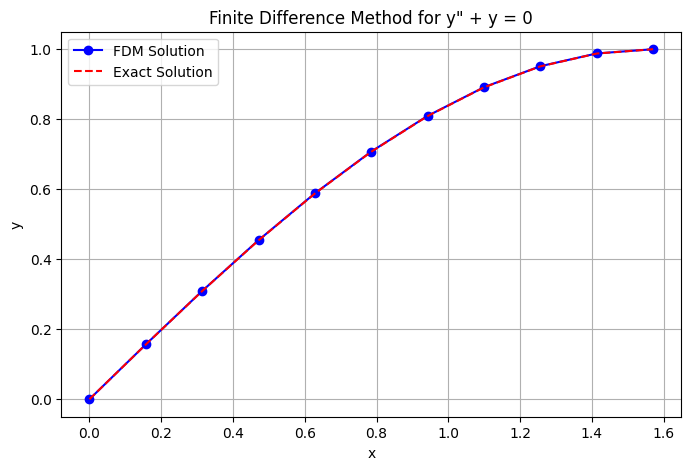

In [1]:
# Solution. Minimize this first.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # number of intervals- N+1 points for N interval. In this case, 11 points.
a, b = 0, np.pi/2 # boundaries of the simulation domain
h = (b - a) / N # size of each grid

# Boundary conditions
y0, yN = 0, 1 # two known points

# Build matrix A and vector b
A = np.zeros((N-1, N-1)) # (N-1) x (N-1) array. For N= 10, A array is 9 x 9: 9 unknowns to solve.  
b_vec = np.zeros(N-1) # N-1 array

for i in range(N-1): # index from 0 to N-2- build a system of equations for each point. For N= 10, A array will have row index from 0 to 8 and column index from 0 to 8. 
    A[i, i] = -2 + h**2 # fill in the element along the diagonal of A array- See the formula above.
    if i > 0: # away from the left boundary
        A[i, i-1] = 1
    if i < N-2: # away from the right boundary 
        A[i, i+1] = 1

# Adjust for boundary conditions
b_vec[0] -= y0 # first equation- index 0
b_vec[N-2] -= yN # last equation- index N-2

# Solve system
Y_inner = np.linalg.solve(A, b_vec) # solve the systems of equation with A and b_vec defined

# Full solution including boundaries 
Y = np.concatenate(([y0], Y_inner, [yN])) # join a sequence of arrays along y axis using np.concatenate
x_vals = np.linspace(a, b, N+1) # rememebr if we use linspace, we have N+1 points

# Exact solution
y_exact = np.sin(x_vals)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_vals, Y, 'bo-', label='FDM Solution')
plt.plot(x_vals, y_exact, 'r--', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Finite Difference Method for y" + y = 0')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise

Use Finite Difference Method (FDM) for a simply supported beam under uniform load to solves the bending Moment $ M(x)$ using $$ \frac{d^2 M}{dx^2} = -q $$

Boundary conditions: $M(0) = 0,  M(L) = 0 $

With the parameters in the code cell below, compare the bending moment with the exact solution:
$$ M(x)= 2q​x(L−x) $$



In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0       # Length of beam (m)
E = 200e9     # Young's modulus in Pascals
I = 1e-6      # Moment of inertia in m^4
q = 1         # Uniform load (N/m)
n = 101       # Number of grid points- Note the difference from the example above!!
dx = L / (n - 1)
x = np.linspace(0, L, n)

# Your code here
M = 2 * q * x * (L - x)  
y = np.zeros(n) 
print(M)

[0.     0.0198 0.0392 0.0582 0.0768 0.095  0.1128 0.1302 0.1472 0.1638
 0.18   0.1958 0.2112 0.2262 0.2408 0.255  0.2688 0.2822 0.2952 0.3078
 0.32   0.3318 0.3432 0.3542 0.3648 0.375  0.3848 0.3942 0.4032 0.4118
 0.42   0.4278 0.4352 0.4422 0.4488 0.455  0.4608 0.4662 0.4712 0.4758
 0.48   0.4838 0.4872 0.4902 0.4928 0.495  0.4968 0.4982 0.4992 0.4998
 0.5    0.4998 0.4992 0.4982 0.4968 0.495  0.4928 0.4902 0.4872 0.4838
 0.48   0.4758 0.4712 0.4662 0.4608 0.455  0.4488 0.4422 0.4352 0.4278
 0.42   0.4118 0.4032 0.3942 0.3848 0.375  0.3648 0.3542 0.3432 0.3318
 0.32   0.3078 0.2952 0.2822 0.2688 0.255  0.2408 0.2262 0.2112 0.1958
 0.18   0.1638 0.1472 0.1302 0.1128 0.095  0.0768 0.0582 0.0392 0.0198
 0.    ]


## 2. Shooting Method
The shooting method converts a BVP into an IVP by guessing the initial slope and iteratively adjusting it until the boundary condition at the other end is satisfied.

**Algorithm Steps:**
1. Define the ODE as a system of first-order equations- Conver BVP to IVP
2. Guess an initial slope.
3. Integrate using a method (e.g., Runge-Kutta) until the end boundary.
4. Check boundary condition at endpoint.
5. Adjust the slope using a root-finding approach such as the Secant method. 


### Example- Shooting Method for Boundary Value Problem

We solve the ODE:

$$ y'' + y = 0, \quad y(0)=0, \; y(\pi/2)=1 $$

This is a well-posed problem. The exact solution is:

$$ y(x) = \sin(x) $$

We will use the **shooting method** with Runge-Kutta integration and secant method for slope adjustment.

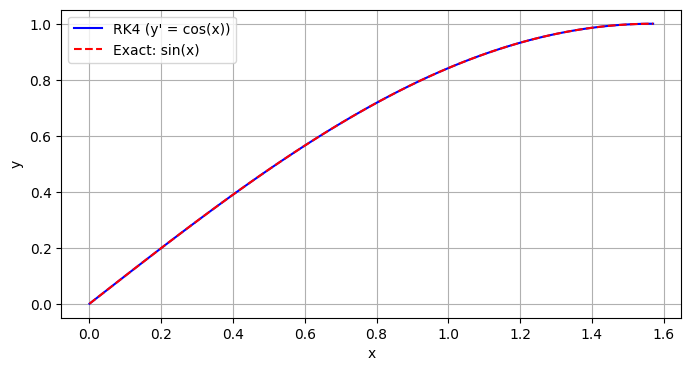

In [3]:
# Your code here- solution for y'= cos(x), y(0)=0
# Let's start with an IVP solver using RK4
# Plot your results
y_vals = np.zeros_like(x_vals)
y_vals[0] = y0

for j in range(len(x_vals) - 1):
	xj = x_vals[j]
	hj = x_vals[j+1] - xj
	k1 = np.cos(xj)
	k2 = np.cos(xj + hj/2)
	k3 = np.cos(xj + hj/2)
	k4 = np.cos(xj + hj)
	y_vals[j+1] = y_vals[j] + (hj/6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Plot the numerical solution and exact solution (sin(x))
plt.figure(figsize=(8,4))
plt.plot(x_vals, y_vals, 'b-', label="RK4 (y' = cos(x))")
plt.plot(x_exact, y_exact, 'r--', label="Exact: sin(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Final slope found: 1.000001
Numerical solution @ x= pi/2: 1.000000 (target = 1)


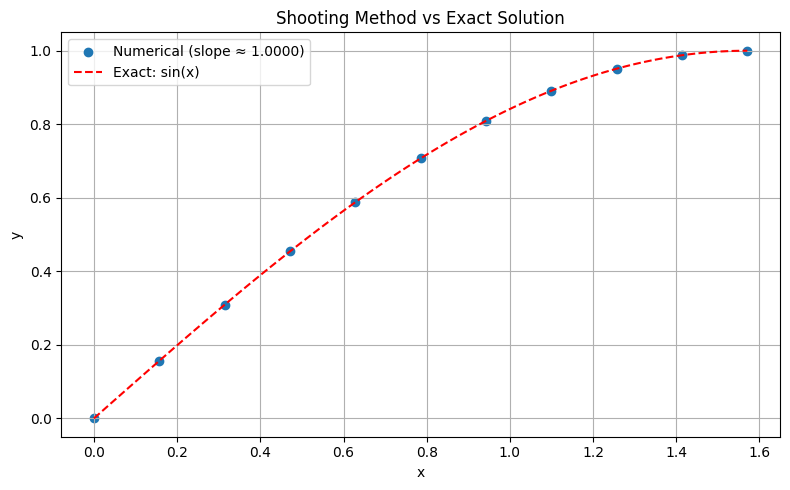

In [1]:
# Solution. Minimize this first.
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE system: y'' + y = 0 -> y1' = y2 (slope- first element of the ode array), y2' = -y1 (relation from equation- the second element of the ode array)
def ode_system(x, y):
    return np.array([y[1], -y[0]]) # first element of the ODE system array (y1'- the slope)= second element of the solution y array (dy/dx= slope)
                                # second element of the ODE system array (y2')= - first element of the solution y array (y value)

# Runge-Kutta 4th order 
def rk4_step(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + h/2, y + h*k1/2)
    k3 = f(x + h/2, y + h*k2/2)
    k4 = f(x + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Use RK4 to integrate
# Starts at x=0 with y(0)=0 and guessed slope.
def integrate(slope, n=10): 
    a, b = 0, np.pi/2 # boundaries
    h = (b - a)/n # step size
    x_vals = np.linspace(a, b, n+1) # need n+1 points including the boundaries
    y = np.array([0.0, slope]) # initial guess
    sol = [y[0]] 
    for i in range(n): # Integrates to x=π/2.
        y = rk4_step(ode_system, x_vals[i], y, h) # ode function loop through the x_values
        sol.append(y[0]) # solution array 
        # print(sol)
    return x_vals, sol # Returns the solution curve.

# Shooting method
def shooting_method(s1, s2, target, tol=1e-8, max_iter=100): # You can also have tol and max_iter as parameters
    x1, y1 = integrate(s1) # return 1st x_values & sol using RK 4 integrator
    x2, y2 = integrate(s2) # return 2nd x_values & sol using RK 4 integrator
    for i in range(max_iter):
        f1, f2 = y1[-1] - target, y2[-1] - target # f1 and f2 are the errors for the two guesses: how far the end value is from the target.
        if abs(f2 - f1) < 1e-14: # avoid division by zero by exitign the program
            break
        s_new = s2 - f2*(s2 - s1)/(f2 - f1) # compute a new slope s_new using the secant method formula snew​=s2​−f2(​(f2​−f1)/(​s2​−s1))​​
        s1, s2 = s2, s_new
        x2, y2 = integrate(s2)
        if abs(y2[-1] - target) < tol:
            break
        i += 1
    return x2, y2, s2

# Implement shooting method
x_num, y_num, slope = shooting_method(0.5, 5, 1.0) 
# s1, s2 = 0.5, 5.0 # two initial guesses for the slope at the starting point. You need two initial guesses to use the secant method.
# target = 1.0 # target value at x= pi/2

# Exact solution: y(x) = sin(x)
x_exact = np.linspace(0, np.pi/2, 100)
y_exact = np.sin(x_exact)

print(f"Final slope found: {slope:.6f}")
print(f"Numerical solution @ x= pi/2: {y_num[-1]:.6f} (target = 1)")

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x_num, y_num, label=f'Numerical (slope ≈ {slope:.4f})')
plt.plot(x_exact, y_exact, 'r--', label='Exact: sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shooting Method vs Exact Solution')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Exercise 

Use the shotting method for a simply supported beam under uniform load to solves the bending Moment $ M(x)$ using $$ \frac{d^2 M}{dx^2} = -q $$

Boundary conditions: $ M(0) = 0,  M(L) = 0 $

Compare the bending moment with the exact solution:
$$ M(x)= 2q​x(L−x) $$

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0       # Length of beam (m)
E = 200e9     # Young's modulus in Pascals
I = 1e-6      # Moment of inertia in m^4
w = 1      # Uniform load (N/m)
n = 101       # Number of grid points- Note the difference from the example above!!
dx = L / (n - 1)
x = np.linspace(0, L, n)

# Your code here
# Boundary conditions: M(0) = 0, M(L) = 0
M_exact = 2 * w * x * (L - x)
y = np.zeros(n)
print(M_exact)

[0.     0.0198 0.0392 0.0582 0.0768 0.095  0.1128 0.1302 0.1472 0.1638
 0.18   0.1958 0.2112 0.2262 0.2408 0.255  0.2688 0.2822 0.2952 0.3078
 0.32   0.3318 0.3432 0.3542 0.3648 0.375  0.3848 0.3942 0.4032 0.4118
 0.42   0.4278 0.4352 0.4422 0.4488 0.455  0.4608 0.4662 0.4712 0.4758
 0.48   0.4838 0.4872 0.4902 0.4928 0.495  0.4968 0.4982 0.4992 0.4998
 0.5    0.4998 0.4992 0.4982 0.4968 0.495  0.4928 0.4902 0.4872 0.4838
 0.48   0.4758 0.4712 0.4662 0.4608 0.455  0.4488 0.4422 0.4352 0.4278
 0.42   0.4118 0.4032 0.3942 0.3848 0.375  0.3648 0.3542 0.3432 0.3318
 0.32   0.3078 0.2952 0.2822 0.2688 0.255  0.2408 0.2262 0.2112 0.1958
 0.18   0.1638 0.1472 0.1302 0.1128 0.095  0.0768 0.0582 0.0392 0.0198
 0.    ]
